# Data Science Intern at LetsGrowMore for December 2021

NAME :- SHUBHAM BHALERAO

Task :- 2.2) Prediction using Decision Tree Algorithm

Level :- Intermediate

Language :- Python

Prediction using Decision Tree Algorithm :
Create the Decision Tree classifier and visualize it graphically.

The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Dataset : https://bit.ly/3kXTdox

# Importing Required Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix 

# Loading Or Reading The CSV File

In [3]:
Iris_Dataframe = pd.read_csv("Iris.csv")
Iris_Dataframe

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratory Data Analysis EDA on the dataset

In [4]:
Iris_Dataframe.head() # Display the first five rows of the data from  dataset.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
Iris_Dataframe.tail() # Display the last five rows of the data from dataset.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
# Renaming the column name SepalLengthCm as Sepal_Length , SepalWidthCm as Sepal_Width , PetalLengthCm as Petal_Length , PetalWidthCm as Petal_Width.
Iris_Dataframe.rename(columns={'SepalLengthCm':'Sepal_Length', 'SepalWidthCm':'Sepal_Width','PetalLengthCm':'Petal_Length','PetalWidthCm':'Petal_Width'}, inplace=True)
Iris_Dataframe

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
# Replacing the data Iris-virginica by Virginica , Iris-setosa by Setosa and Iris-versicolor by Versicolor in the Species Column for easy data manipulation.
Iris_Dataframe['Species'].replace({'Iris-virginica':'Virginica','Iris-setosa':'Setosa','Iris-versicolor':'Versicolor'},inplace=True)
Iris_Dataframe

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,Setosa
2,3,4.7,3.2,1.3,0.2,Setosa
3,4,4.6,3.1,1.5,0.2,Setosa
4,5,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Virginica
146,147,6.3,2.5,5.0,1.9,Virginica
147,148,6.5,3.0,5.2,2.0,Virginica
148,149,6.2,3.4,5.4,2.3,Virginica


In [9]:
# Here we are droping the Id column  from the data set as it is not necessary for data manipluation and prediction. 
Iris_Dataframe = Iris_Dataframe.drop("Id", axis=1) 
Iris_Dataframe

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [12]:
Iris_Dataframe.shape # It shows the shape of the data variable in tuple format i.e. no. of rows and column.

(150, 5)

In [11]:
Iris_Dataframe.info() # Print the summary of the dataframe like no. of rows and detailed information about the columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
Iris_Dataframe.describe() # Shows the Statistical details of the column which has numerical values.

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
pd.DataFrame(Iris_Dataframe.Species).value_counts() # Gives the count of categorical column with respect to each category.
# i.e. there are 50 Setosa , 50 Versicolor and 50 Virginica different species present in the dataset.

Species   
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

In [16]:
Iris_Dataframe.isna().sum() # Checks whether the dataframe contains any null record or not and then gives the count of null records. 

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

# Data Visualization

<AxesSubplot:>

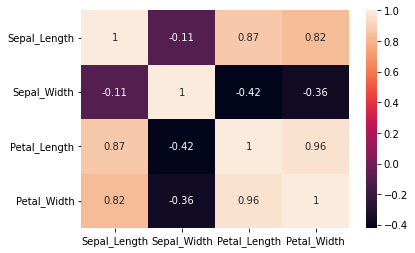

In [17]:
sns.heatmap(Iris_Dataframe.corr(),annot=True) # Heatmap gives Color encoded 2D representation of Data.

Sepal_Length  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.0  5.1  5.2  ...  6.8  6.9  \
Species                                                         ...             
Setosa        1.0  3.0  1.0  4.0  2.0  5.0  4.0  8.0  8.0  3.0  ...  NaN  NaN   
Versicolor    NaN  NaN  NaN  NaN  NaN  NaN  1.0  2.0  1.0  1.0  ...  1.0  1.0   
Virginica     NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  ...  2.0  3.0   

Sepal_Length  7.0  7.1  7.2  7.3  7.4  7.6  7.7  7.9  
Species                                               
Setosa        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Versicolor    1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Virginica     NaN  1.0  3.0  1.0  1.0  1.0  4.0  1.0  

[3 rows x 35 columns]


<AxesSubplot:xlabel='Sepal_Length', ylabel='Species'>

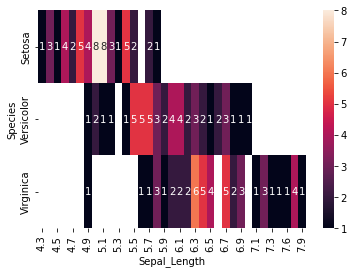

In [18]:
# Grouping the dataset by Species and Sepal_Length and then unstacking them.
group1=Iris_Dataframe.groupby(['Species','Sepal_Length'])
species_sepal=group1.size().unstack()
print(species_sepal)
sns.heatmap(species_sepal,annot=True) 

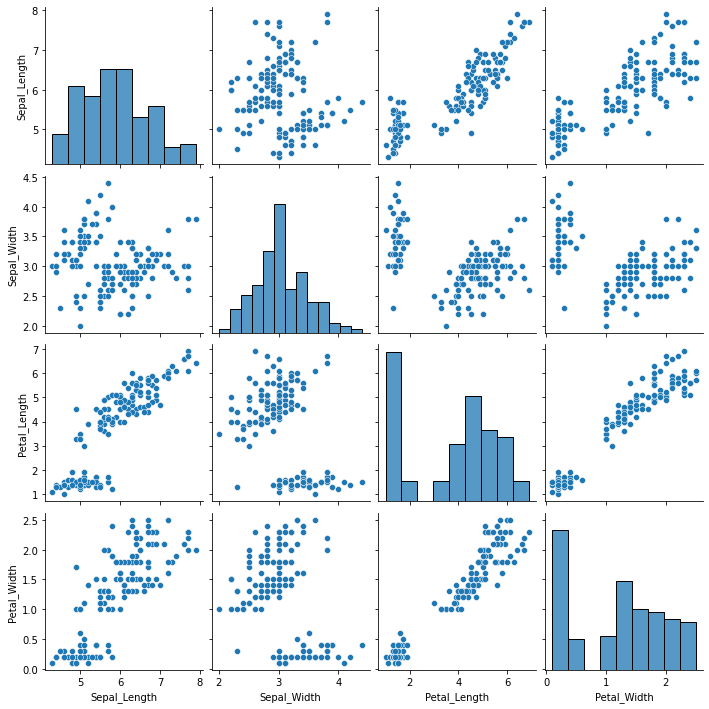

In [19]:
sns.pairplot(Iris_Dataframe)

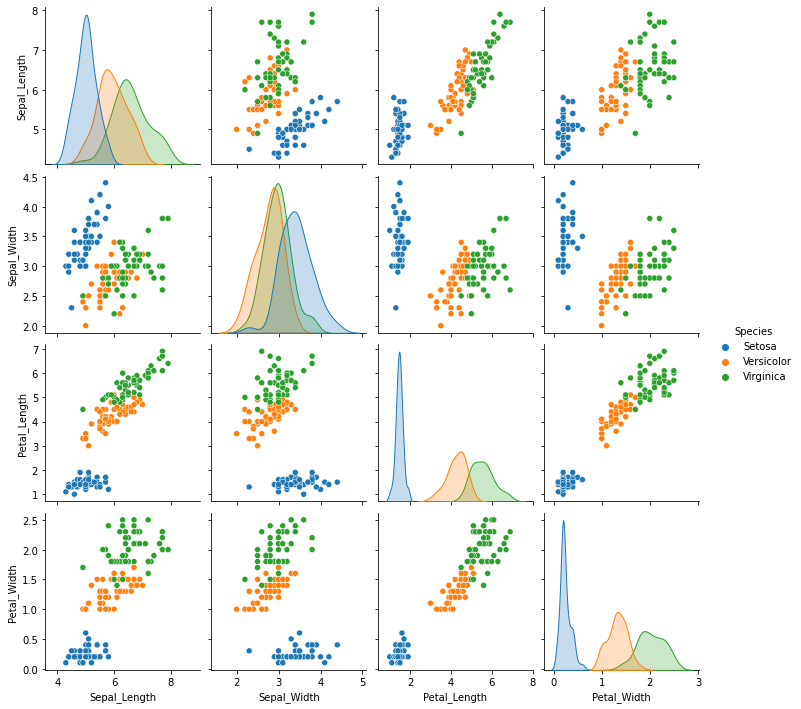

In [20]:
sns.pairplot(Iris_Dataframe,hue='Species') # Pairplot gives a pairwise relationships in a dataframe.
# Blue , Orange and Green color represents the Setosa , Versicolor and Virginica Species respectively.

array([[<AxesSubplot:title={'center':'Sepal_Length'}>,
        <AxesSubplot:title={'center':'Sepal_Width'}>],
       [<AxesSubplot:title={'center':'Petal_Length'}>,
        <AxesSubplot:title={'center':'Petal_Width'}>]], dtype=object)

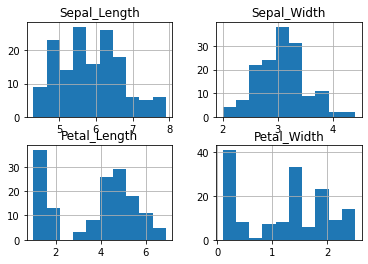

In [21]:
Iris_Dataframe.hist() # Histogram gives the frequency distribution of the columns containing numerical data.

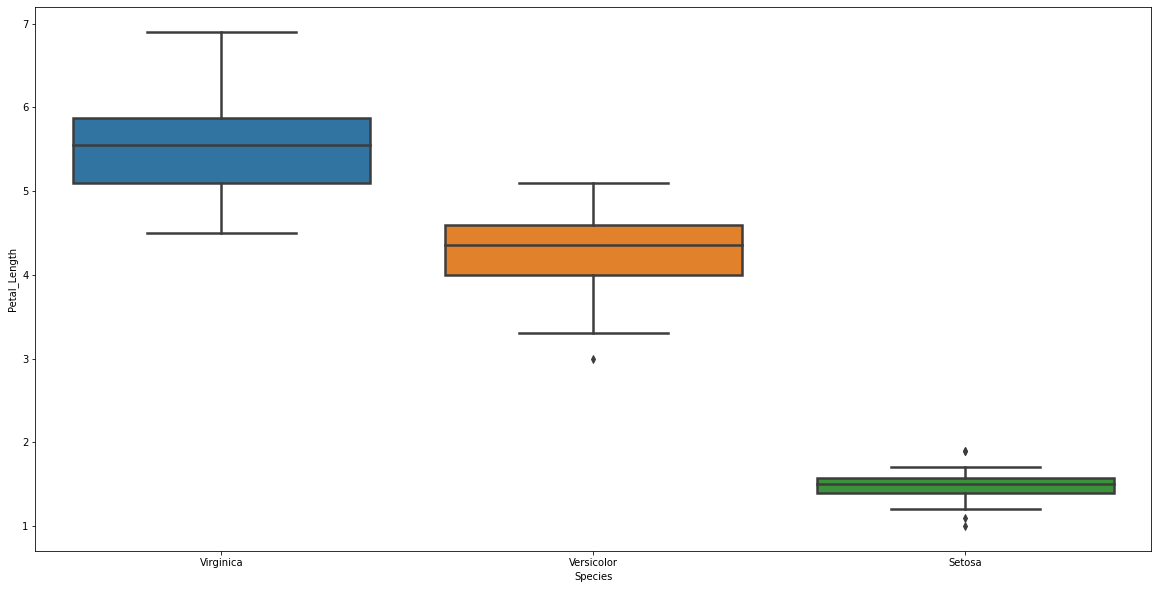

In [22]:
# Boxplot is a method for graphically representing the skewness of numerical data.
# Data beyond the boxplot are called as exceptions or outliers.
fig=plt.gcf()
fig.set_size_inches(20,10)
fig=sns.boxplot(x='Species',y='Petal_Length',data=Iris_Dataframe,order=['Virginica', 'Versicolor', 'Setosa'],linewidth=2.5,orient='v',dodge=False)

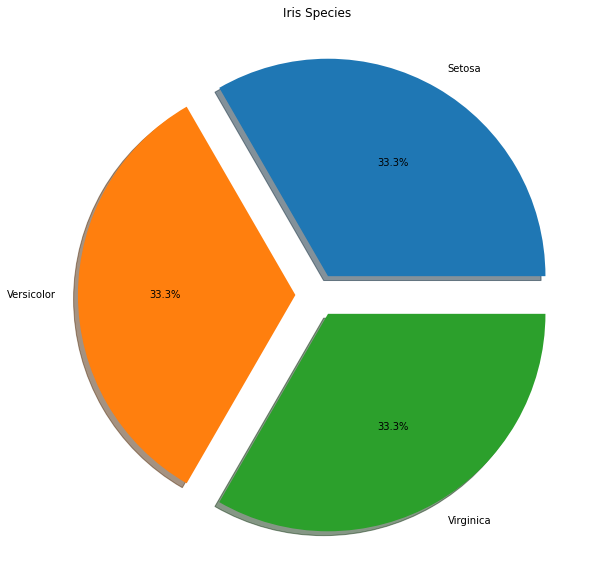

In [24]:
# Pie plot shows the quantity of data from categorical columns.
ax=plt.subplots(1,1,figsize=(10,8))
Iris_Dataframe['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(20,10))
plt.title("Iris Species")
plt.ylabel('   ')
plt.show()

<AxesSubplot:xlabel='Species', ylabel='Sepal_Length'>

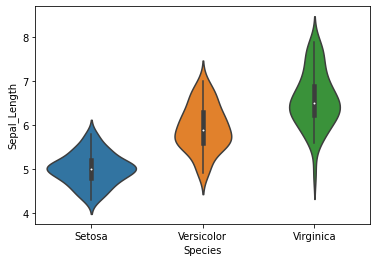

In [25]:
# Violinplot displays distribution of data accross all level of category.
sns.violinplot(x="Species",y="Sepal_Length",data=Iris_Dataframe,split=True)

# Splitting the dataset as X = independent variable and y = dependent variable for Analysis and Prediction

In [26]:
X=Iris_Dataframe.iloc[:,[0,1,2,3]] # Fetching all rows and 4 columns excluding the species column in the X variable.
Y=Iris_Dataframe.Species # Fetching the column named Species in the Y Variable.

In [27]:
print("Number of rows and columns in the X variable is",X.shape) # Shows the shape of the data variable in tuple format i.e. no. of rows and column.
print("Number of rows and columns in the Y variable is",Y.shape) # Shows the shape of the data variable in tuple format i.e. no. of rows and column.

Number of rows and columns in the X variable is (150, 4)
Number of rows and columns in the Y variable is (150,)


# Splitting the dataset into Train and Test dataset

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=18) 

In [29]:
print("Number of rows and columns in the X_train dataset is",X_train.shape) # Shows the shape of the data variable in tuple format i.e. no. of rows and column.
print("Number of rows and columns in the Y_train dataset is",Y_train.shape) # Shows the shape of the data variable in tuple format i.e. no. of rows and column.
print("Number of rows and columns in the X_test dataset is",X_test.shape) # Shows the shape of the data variable in tuple format i.e. no. of rows and column.
print("Number of rows and columns in the Y_test dataset is",Y_test.shape) # Shows the shape of the data variable in tuple format i.e. no. of rows and column.

Number of rows and columns in the X_train dataset is (120, 4)
Number of rows and columns in the Y_train dataset is (120,)
Number of rows and columns in the X_test dataset is (30, 4)
Number of rows and columns in the Y_test dataset is (30,)


# Making a Decision tree on iris dataset

In [31]:
from sklearn.tree import DecisionTreeClassifier
Iris_DT = DecisionTreeClassifier(criterion='entropy')
Iris_DT.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [32]:
y_pred_train = Iris_DT.predict(X_train)
y_pred_test = Iris_DT.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred_test)

0.9666666666666667

In [35]:
accuracy_score(Y_train, y_pred_train)

1.0

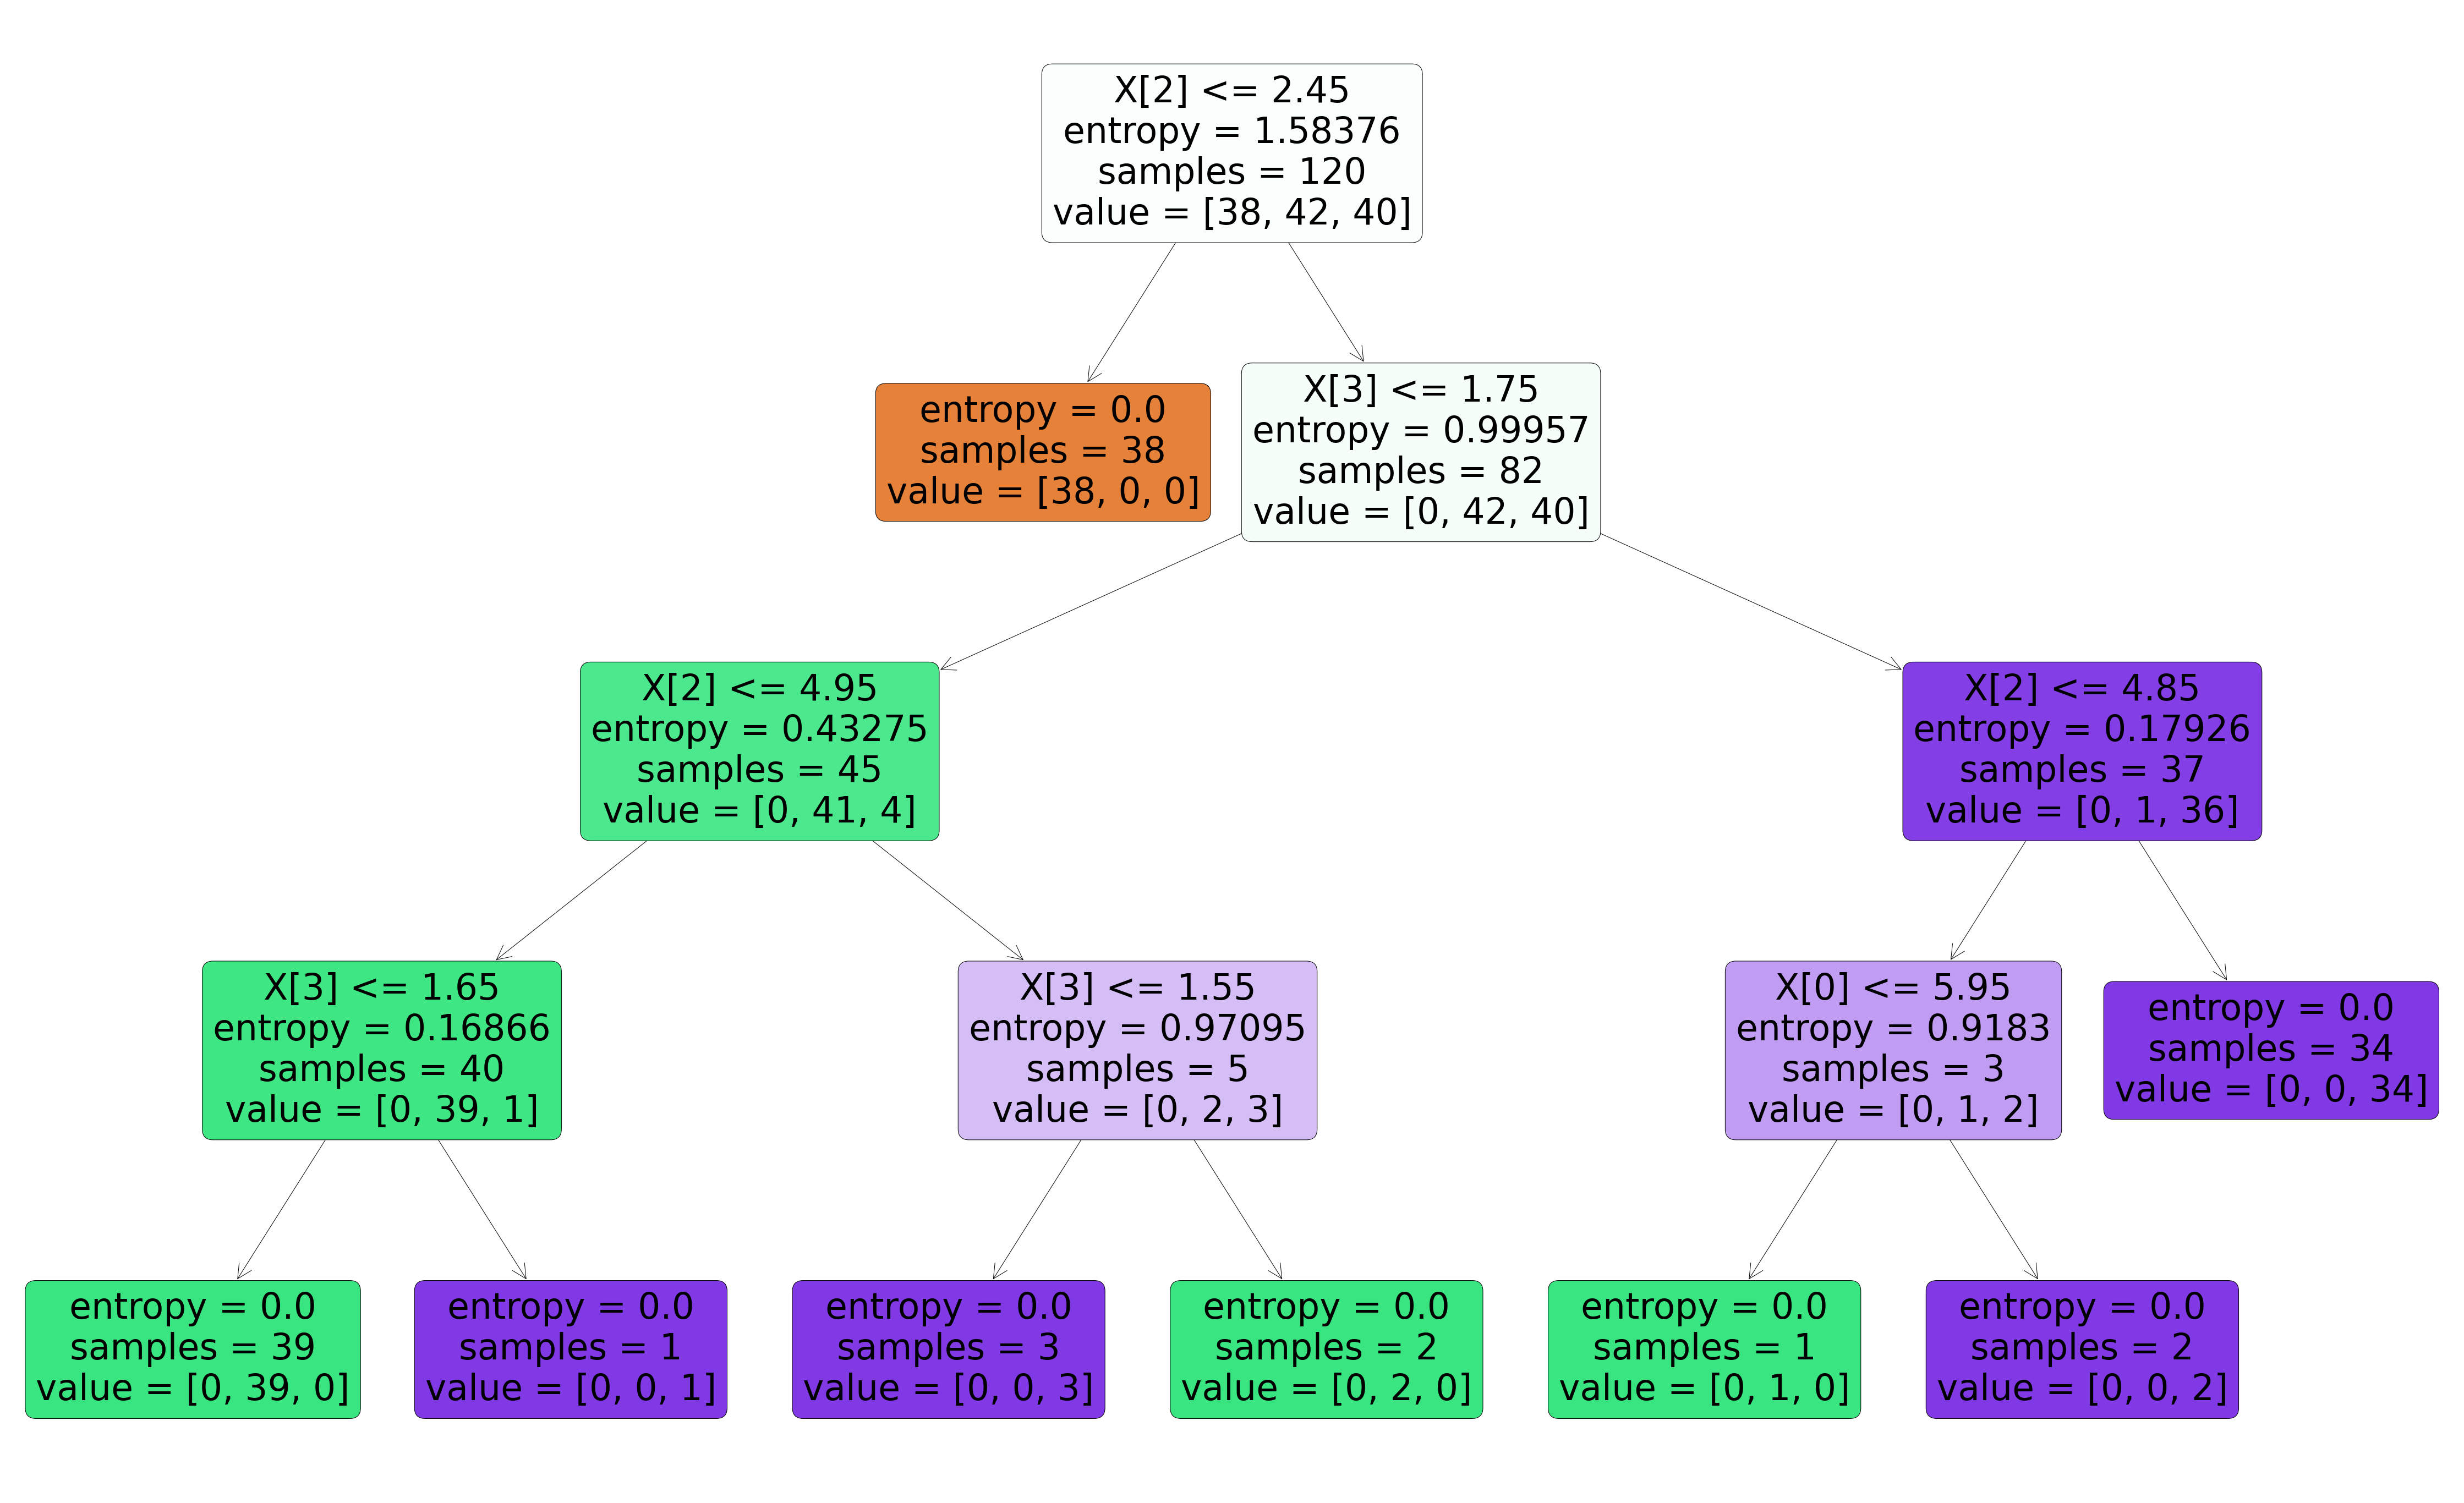

In [37]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 80, 50
plot_tree(Iris_DT,precision=5,rounded=True,filled=True);